# Deep Learning with PyTorch: A 60 Minute Blitz

## Training a Classifier

### What About Data?

Generally, when you have to deal with image, text, audio or video data, you can use standard Python packages that load data into a NumPy array. Then you can convert this array into a `torch.*Tensor`.

- For images, packages such as Pillow, OpenCV are useful
- For audio, packages such as SciPy and librosa
- For text, either raw Python or Cython based loading, or NLTK and SpaCy are useful

Specifically for vision, we have created a package called `torchvision` that has data loaders for common datasets such as Imagenet, CIFAR10, MNIST etc. and data transformers for images, viz. `torchvision.datasets` and `torch.utils.data.DataLoader`. This provides a huge convenience and avoids writing boilerplate code.

For this tutorial we will use the CIFAR10 dataset. It has the classes: 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'. The images in CIFAR10 are of size 3x32x32, i.e. 3-channel colour images of 32x32 pixels in size.

![](images/cifar10.png)

### Training an Image Classifier

We will do the following steps in order:

1. Load and normalising the CIFAR10 training and test datasets using `torchvision`
2. Define a Convolution Neural Network
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data

#### 1. Loading and normalising CIFAR10

Using `torchvision` it's extremely easy to load CIFAR10.

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

The output of `torchvision` datasets are PILImage images of range [0, 1]. We transform them to Tensors of normalised range [-1, 1].

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root="./data", train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root="./data", train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


Let's show some of the training images, for fun.

  cat   car   car  ship


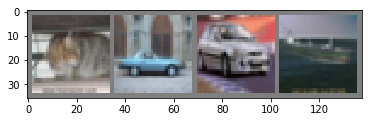

In [4]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# Functions to show an image

def imshow(img):
    img = img / 2 + 0.5    # Unnormalise
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    
# Get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Show images
imshow(torchvision.utils.make_grid(images))
# Print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))